# Examen Módulo 2 - Simulación Montecarlo. <font color =blue> Tipo de examen 1.  </font>

Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:

- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería Examen1_LopezMichel.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

In [2]:
%matplotlib inline 

import sympy as sym
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from sympy import init_printing 
from sympy import *

from scipy.integrate import odeint


init_printing()
sym.var('x y t')
T = sym.Function('T')


# Primer punto (50 puntos).

## <font color = red> Problema 1 <font>

### Evaluación numérica de integrales por el método montecarlo


**1. (20 puntos)** 

Estimar la siguiente integral por el método montecarlo

$$I = \int_{-\pi}^{\pi} \int_{0}^{2} (x + \sin(y) + 1 )dx dy$$


**2. (20 puntos)** 

Realice una tabla con la librería pandas para los resultados de la integración Monte Carlo para la ecuación anterior realizando
$100$ realizaciones para cada uno de los valores $N$ que se muestran en la
tabla siguiente. Muestre el valor estimado de la integral promedio y el resultado de máximo y mínimo de las $100$ realizaciones.

|N|min|promedio|max|
|---|---|---|---|
|10|*|*|*|
|100|*|*|*|
|1000|*|*|*|
|10000|*|*|*|



**3. (10 puntos)** 

Grafique la funcion a integrar.


In [3]:
n=1000
f=lambda x,y: x+np.sin(y)+1
a,b=0,2
c,d=-np.pi,np.pi
altura=4
x=np.random.uniform(a,b,n)
y=np.random.uniform(c,d,n)
z=np.random.uniform(a,altura,n)
X=np.arange(a,b,.01)
Y=np.arange(c,d,.01)
fx=f(x,y)
n0=(len(x[z<fx])+len(y[z<fx]))/2
base=b-a
base2=d-c
yest=n0/n*(base*altura*base2)
print('Aproximación con Monte Carlo = ',yest)

Aproximación con Monte Carlo =  25.635396053292713


In [4]:
def funcion(n):
    f=lambda x,y: x+np.sin(y)+1
    a,b=0,2
    c,d=-np.pi,np.pi
    altura=4
    x=np.random.uniform(a,b,n)
    y=np.random.uniform(c,d,n)
    z=np.random.uniform(a,altura,n)
    X=np.arange(a,b,.01)
    Y=np.arange(c,d,.01)
    fx=f(x,y)
    n0=(len(x[z<fx])+len(y[z<fx]))/2
    base=b-a
    base2=d-c
    yest=n0/n*(base*altura*base2)
    return yest
lista10,lista100,lista1000,lista10000=[],[],[],[]
for rep in range(0,100):
    x=funcion(10)
    lista10.append(x)
for rep in range(0,100):
    x=funcion(100)
    lista100.append(x)
for rep in range(0,100):
    x=funcion(1000)
    lista1000.append(x)
for rep in range(0,100):
    x=funcion(10000)
    lista10000.append(x)
total = pd.DataFrame({'10': lista10,'100': lista100,'1000': lista1000,'10000': lista10000})
pd.set_option('display.max_columns',6)
pd.set_option('display.max_rows',10)
pd.set_option('display.width',78)
pd.set_option('precision',3)
x=total.describe()
df=pd.DataFrame.transpose(x)
df = df[['min','mean','max']]
df

,min,mean,max
10,10.053,26.188,45.239
100,20.609,25.555,30.159
1000,23.172,25.113,27.043
10000,24.339,25.138,25.927


Como se puede observar en la tabla, entre mayor sea N, el rango entre el dato mínimo y máximo va disminuyendo, por la presición de los datos. También, se conoce que el dato de la integral es 8π, entre mayor es N, se acerca cada vez más el promedio al dato real, que expresado en decimales es 25.1327

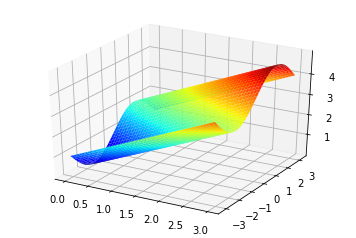

In [5]:
var('x,y,t')
sym.plotting.plot3d(x+sin(y)+1, (x,0,3),(y,-pi,pi))
integrate(x+sin(y)+1, (x,0,2),(y,-pi,pi))

**OTRA MANERA DE HACER LA GRÁFICA**

In [59]:
!pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\Diana\AppData\Local\pip\Cache\wheels\cc\87\3f\6a282eb21da5d8223472bed40ee023cdcf2e9691b117969a4c
Successfully built plotly


In [64]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)


f=lambda x,y: x+np.sin(y)+1
inc=.1
a,b=0,2
c,d=-np.pi,np.pi
altura=4
x=np.arange(a,b,inc)
y=np.arange(c,d,inc)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)


data=[go.Surface(z=Z)]
py.iplot(data)

## Validando el análisis precio-umbral (50 puntos).

Importar precios de cierre de acciones desde Yahoo Finance con la libreria pandas-datareader. Y a pronosticar escenarios de evolución de precios suponiendo que los rendimientos diarios distribuyen normalmente. 

Como la evolución de precios es aleatoria, utilizamos la simulación montecarlo (hacer muchas simulaciones de escenarios de evolución de precios) para obtener probabilidades de que los precios de cierre estén encima de un valor umbral y tomar decisiones con base en estas probabilidades.

Notemos que por debajo de este análisis está el supuesto de que las tendencias de los datos históricos se conservarán en la proyección. Este supuesto puede o no ser válido.


**-Punto 1 (50 puntos).**

Importar los precios de cierre ajustados de las acciones de la compañía AutoZone, Inc. (AZO) en el año 2016 y proyectar 100 escenarios de precios para el año 2017. 

Si se quiere ganar un $5\%$ de interés en la inversión, calcule y muestre un gráfico con la probabilidad de que el precio de cierre de las acciones supere el precio umbral que permite ganar este interés.


Según el análisis hecho, ¿invertiría usted en las acciones de esta compañía?



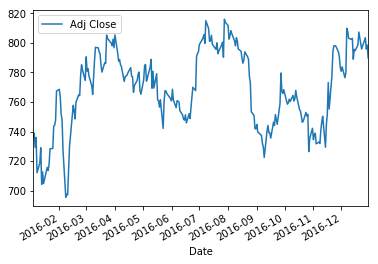

In [17]:
import pandas_datareader.data as web
import datetime
start=datetime.datetime(2016,1,1)
end=datetime.datetime(2016,12,31)
f=web.DataReader("AZO",'yahoo',start,end)
m=f.plot(f.index,'Adj Close')
m

In [5]:
import datetime
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data
start=datetime.datetime(2016,1,1)
end=datetime.datetime(2016,12,31)
AZO=data.DataReader("AZO",'yahoo',start,end)

In [8]:
days = (AZO.index[-1] - AZO.index[0]).days
cagr = ((((AZO['Adj Close'][-1]) / AZO['Adj Close'][1])) ** (252.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

AZO['Returns'] = AZO['Adj Close'].pct_change()
vol = AZO['Returns'].std()*sqrt(252)
ANNUAL=int(vol*100)
print ("Annual Volatility =",ANNUAL,"%")

CAGR = 4.76%
Annual Volatility = 18 %


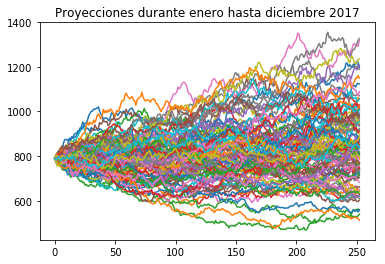

In [44]:
S = AZO['Adj Close'][251] 
T = 252
mu = 0.0697
vol = 0.18
result=[]
for i in range(100):
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    price_list = [S]
 
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    plt.plot(price_list)
result.append(price_list[-1])
plt.title('Proyecciones durante enero hasta diciembre 2017')
plt.show()

In [20]:
S = AZO['Adj Close'][251]
print (S)
mini=S*1.05
print(mini)

789.789978
829.2794769


Los que se hizo fue, primero obtener el ultimo dato de cierre de la compañia, es decir, del 30 de diciembre del 2016 (Ultimo día habil). A partir de este dato, y considerando las proyecciones, se sacará cuántas de las proyecciones superan el umbral de inversión. Esto, considerando que se invierte el ultimo día habil del 2016 y se termina el último del 2017

In [21]:
mini=S*1.05
c=0
for n in range (0,100):
    if result[n]>=mini:
        c+=1
print(c,'%')

49 %


In [22]:
mini=S
c=0
for n in range (0,100):
    if result[n]>=mini:
        c+=1
print(c,'%')

55 %


Yo no invertiría en la empresa, es casi el 50% probable de que pase el umbral, el 55% de que no se tengan pérdidas, sin embargo, pienso que debe haber otras opciones con probabilidades menos riesgosas.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Michel Emanuel López Franco.
</footer>